In [4]:
import pandas as pd

In [1]:
from googletrans import Translator

# Inisialisasi objek translator
translator = Translator()

# Contoh string yang akan diterjemahkan
sample_text = "Puedes caminar donde quieras"

# Menerjemahkan string ke bahasa Inggris
translated_text = translator.translate(sample_text, src='es', dest='en').text

# Tampilkan hasil terjemahan
print("String Sebelum Terjemahan:")
print(sample_text)
print("\nString Setelah Terjemahan:")
print(translated_text)


String Sebelum Terjemahan:
Puedes caminar donde quieras

String Setelah Terjemahan:
You can walk wherever you want


In [2]:
from easynmt import EasyNMT
model = EasyNMT("opus-mt")

ModuleNotFoundError: No module named 'easynmt'

In [3]:
from easynmt import EasyNMT

# Create an instance of the EasyNMT translator
translator = EasyNMT('m2m_100_418M')

# Example text in Spanish
sample_text = "Hola, ¿cómo estás?"

# Translate the text to English
translated_text = translator.translate(sample_text, target_lang='en')

# Print the result
print("Text Before Translation:")
print(sample_text)
print("\nText After Translation:")
print(translated_text)


ModuleNotFoundError: No module named 'easynmt'

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Contoh paragraf panjang
paragraph = "This is a long paragraph with multiple sentences. It includes words like running, jumped, and swimming."

# Fungsi untuk menghasilkan N-grams dari teks
def extract_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform([text])
    return vectorizer.get_feature_names_out()

# Contoh penggunaan untuk N-grams dengan n=2 (bigrams)
bigrams = extract_ngrams(paragraph, 2)

# Tampilkan hasil
print(f"Bigrams: {bigrams}")


Bigrams: ['and swimming' 'includes words' 'is long' 'it includes' 'jumped and'
 'like running' 'long paragraph' 'multiple sentences' 'paragraph with'
 'running jumped' 'sentences it' 'this is' 'with multiple' 'words like']


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Contoh paragraf panjang
paragraph = "This is a long paragraph with multiple sentences. It includes words like running, jumped, and swimming."

# Fungsi untuk menghasilkan N-grams dari teks
def extract_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform([text])
    feature_names = vectorizer.get_feature_names_out()
    return dict(zip(feature_names, ngrams.toarray()[0]))

# Contoh penggunaan untuk N-grams dengan n=2 (bigrams)
bigrams_info = extract_ngrams(paragraph, 2)

# Tampilkan hasil
for bigram, count in bigrams_info.items():
    print(f"{bigram}: {count}")


and swimming: 1
includes words: 1
is long: 1
it includes: 1
jumped and: 1
like running: 1
long paragraph: 1
multiple sentences: 1
paragraph with: 1
running jumped: 1
sentences it: 1
this is: 1
with multiple: 1
words like: 1


In [2]:
# Function for text cleaning & preprocessing
from nltk.corpus import stopwords
from lingua import Language, LanguageDetectorBuilder
import spacy
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [8]:
"""
karena pada teks terdapat campuran bahasa inggris dan indonesia,
fungsi ini untuk mendeteksi apakah kata termasuk bahasa inggris 
atau indonesia.
"""
languages = [Language.ENGLISH, Language.INDONESIAN]
detector_en_id = LanguageDetectorBuilder.from_languages(*languages).build()
def detect_lang(string, detector=detector_en_id):
    return detector.detect_language_of(string)
"""
mengubah teks menjadi huruf kecil
"""
def lowercase(text):
    return text.lower()
"""
menghapus semua non kata seperti simbol dan angka
"""
def remove_non_words_and_numeric(text):
    return re.sub(r'[\W\d]+', ' ', text)
"""
menghapus semua whitespace lebih dari 1
"""
def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text)
"""
menghapus semua stopwords
"""
def remove_stopwords(text):
    list_stopwords_id = set(stopwords.words('indonesian'))
    list_stopwords_en = set(stopwords.words('english'))

    list_stopwords = list(list_stopwords_id)+list(list_stopwords_en)

    removed_stopwords = [word for word in text.split(
        ' ') if word not in list_stopwords]
    return ' '.join(removed_stopwords)
"""
mengubah kata ke menjadi bentuk kata dasar,
disable=['parser', 'ner'] agar dapat melakukan lemmatizer pada 1 kata
"""
model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lemmatize(text, nlp=model, stemmer=stemmer):
    doc = nlp(text)
    lemmas = ''

    for word in doc:
        if str(detect_lang(str(word))) == 'Language.ENGLISH':
            #             print('en')
            #             print(word.lemma_)
            lemmas += word.lemma_ + ' '
        elif str(detect_lang(str(word))) == 'Language.INDONESIAN':
            #             print('id')
            #             print(stemmer.stem(str(word)))
            lemmas += stemmer.stem(str(word)) + ' '
        else:
            lemmas += str(word)+' '
    return lemmas
"""
menghapus kata berulang
"""
def remove_duplicate_word(text):
    word_list = text.split()
    unique_words = list(dict.fromkeys(word_list))
    return ' '.join(unique_words)
"""
menghapus kata yang terdiri dari hanya 1 atau 2 karakter
"""
def remove_1or2_strings(text):
    no_single_char = [string for string in list(
        text.split(' ')) if not re.match(r'^.{1,2}$', string)]
    return ' '.join(no_single_char)

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     return tokens


"""
pipeline preprocess
"""
def preprocess(text):
    lowered = lowercase(text)
    only_words = remove_non_words_and_numeric(lowered)
    whitespace_removed = remove_whitespace(only_words)
    no_stopwords = remove_stopwords(whitespace_removed)
    lemmatized = lemmatize(no_stopwords)
    duplicate_removed = remove_duplicate_word(lemmatized)
    single_char_string_removed = remove_1or2_strings(duplicate_removed)

    return single_char_string_removed

In [10]:
sample_response = "Ya pernah, Kepatuhan terhadap jam kerja merupakan salah satu kewajiban ASN. Pernah terdapat salah satu pegawai yang mangkir kerja beberapa hari. Hal itu membuat kecemburuan sosial diantara rekan kerja. Saya selaku Plt. Kepala BKPSDM memerintahkan kepada atasan langsung yang bersangkutan untuk melakukan pemanggilan dan sudah 3 (tiga) kali pemanggilan yang bersangkutan tidak hadir. Saya dan atasan langsung mendatangi tempat tinggalnya tapi yang bersangkutan tidak ada di tempat. Akhirnya atasan langsung menjatuhkan sanksi disiplin sesuai kewenangan berupa pernyataan tidak puas dan disampaikan kepada keluarga yang bersangkutan. Setelah sanksi tersebut yang bersangkutan kembali masuk kerja dan saya lakukan pembinaan dan memotivasi yang bersangkutan untuk melaksanakan tugas dengan baik. Hal ini juga menjadi shock terapi bagi pegawai lainnya"
preprocessed_response = preprocess(sample_response)

In [11]:
print("Data Sebelum Preprocessing:")
print(sample_response)
print("\nData Setelah Preprocessing:")
print(preprocessed_response)

Data Sebelum Preprocessing:
Ya pernah, Kepatuhan terhadap jam kerja merupakan salah satu kewajiban ASN. Pernah terdapat salah satu pegawai yang mangkir kerja beberapa hari. Hal itu membuat kecemburuan sosial diantara rekan kerja. Saya selaku Plt. Kepala BKPSDM memerintahkan kepada atasan langsung yang bersangkutan untuk melakukan pemanggilan dan sudah 3 (tiga) kali pemanggilan yang bersangkutan tidak hadir. Saya dan atasan langsung mendatangi tempat tinggalnya tapi yang bersangkutan tidak ada di tempat. Akhirnya atasan langsung menjatuhkan sanksi disiplin sesuai kewenangan berupa pernyataan tidak puas dan disampaikan kepada keluarga yang bersangkutan. Setelah sanksi tersebut yang bersangkutan kembali masuk kerja dan saya lakukan pembinaan dan memotivasi yang bersangkutan untuk melaksanakan tugas dengan baik. Hal ini juga menjadi shock terapi bagi pegawai lainnya

Data Setelah Preprocessing:
patuh jam kerja salah wajib asn pegawai mangkir cemburu sosial rekan plt kepala bkpsdm perintah 

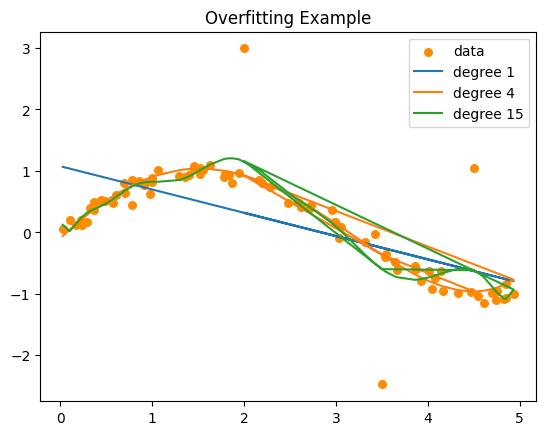

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Add outliers
X_outliers = np.array([2, 3.5, 4.5]).reshape(-1, 1)
y_outliers = np.sin(X_outliers).ravel() + np.random.randn(3) * 0.1
y_outliers[0] += 2
y_outliers[1] -= 2
y_outliers[2] += 2
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

# Plot the data
plt.scatter(X, y, color='darkorange', s=30, marker='o', label="data")

# Fit a polynomial regression model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 4, 15]

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, label=f'degree {degree}')

plt.title("Overfitting Example")
plt.legend()
plt.show()


In [2]:
from transformers import T5ForConditionalGeneration, AutoTokenizer
import torch
model = T5ForConditionalGeneration.from_pretrained("google/flan-ul2", device_map="auto", load_in_8bit=True)                                                                 
tokenizer = AutoTokenizer.from_pretrained("google/flan-ul2")

input_string = "Answer the following question by reasoning step by step. The cafeteria had 23 apples. If they used 20 for lunch, and bought 6 more, how many apple do they have?"                                               

inputs = tokenizer(input_string, return_tensors="pt").input_ids.to("cuda")
outputs = model.generate(inputs, max_length=200)

print(tokenizer.decode(outputs[0]))
# <pad> They have 23 - 20 = 3 apples left. They have 3 + 6 = 9 apples. Therefore, the answer is 9.</s>


pytorch_model-00002-of-00008.bin:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

ChunkedEncodingError: ('Connection broken: IncompleteRead(47150947 bytes read, 4919078564 more expected)', IncompleteRead(47150947 bytes read, 4919078564 more expected))

In [1]:
import nltk
import evaluate
import numpy as np
from datasets import load_dataset
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [2]:
# Acquire the training data from Hugging Face
DATA_NAME = "yahoo_answers_qa"
yahoo_answers_qa = load_dataset(DATA_NAME)

In [3]:
yahoo_answers_qa

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'answer', 'nbestanswers', 'main_category'],
        num_rows: 87362
    })
})

In [5]:
df = pd.DataFrame(yahoo_answers_qa['train'])

# Tampilkan beberapa baris pertama dari DataFrame
print(df.head())

        id                                         question  \
0  2020338                    Why did the U.S Invade Iraq ?   
1  2874684                     How to get rid of a beehive?   
2  4193114      Why don't European restaurants serve water?   
3  1908421  Why hybrid cars gas mileage is better in city ?   
4  3608897         Can someone explain the theory of e=mc2?   

                                              answer  \
0  A small group of politicians believed strongly...   
1  Call an area apiarist.  They should be able to...   
2  There's a general belief in Europe (and in fac...   
3  hybrid cars save energy in two ways: 1.by stor...   
4  In general it means that in a very high speed ...   

                                        nbestanswers          main_category  
0  [A small group of politicians believed strongl...          News & Events  
1  [Call an area apiarist.  They should be able t...  Education & Reference  
2  [There's a general belief in Europe (and in fa.